<a href="https://colab.research.google.com/github/eldorjonneymatov/mdev_ds_pract/blob/main/deep_learning/ball_classifier_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/NanoCode012/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format.git

Cloning into 'OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format'...
remote: Enumerating objects: 548, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 548 (delta 2), reused 5 (delta 2), pack-reused 542
Receiving objects: 100% (548/548), 34.16 MiB | 42.20 MiB/s, done.
Resolving deltas: 100% (218/218), done.


In [2]:
!cd OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format && pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.9 MB 29.1 MB/s 
     |████████████████████████████████| 548 kB 60.9 MB/s 
     |████████████████████████████████| 9.1 MB 60.8 MB/s 
     |████████████████████████████████| 79 kB 8.9 MB/s 
     |████████████████████████████████| 139 kB 75.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.17.1
    Uninstalling docutils-0.17.1:
      Successfully uninstalled docutils-0.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depe

In [3]:
!cd OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format && python main.py -h

usage: main.py [-h] [--Dataset /path/to/OID/csv/] [-y]
               [--classes list of classes [list of classes ...]]
               [--type_csv 'train' or 'validation' or 'test' or 'all']
               [--sub Subset of human verified images or machine generated h or m)]
               [--image_IsOccluded 1 or 0] [--image_IsTruncated 1 or 0]
               [--image_IsGroupOf 1 or 0] [--image_IsDepiction 1 or 0]
               [--image_IsInside 1 or 0] [--multiclasses 0 (default or 1]
               [--n_threads [default 20]] [--noLabels]
               [--limit integer number] [--yoloLabelStyle]
               <command> 'downloader', 'visualizer' or 'ill_downloader'.

Open Image Dataset Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
                        'downloader', 'visualizer' or 'ill_downloader'.

optional arguments:
  -h, --help            show this help message and exit
  --Dataset /path/to/OID/csv/
                        Dire

In [4]:
!cd OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format && python main.py downloader --Dataset /content --classes Football Golf_ball Tennis_ball --type_csv train --limit 250 --noLabel

    [INFO] |  saving dataset configurations at /content/config.json

		   ___   _____  ______            _    _       _    _  
		 .'   `.|_   _||_   _ `.         | |  | |     | |  | |    
		/  .-.  \ | |    | | `. \ _   __ | |__| |_    |  | | |   
		| |   | | | |    | |  | |[ \ [  ]|____   _|     | | | 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_       | |
		 `.___.'|_____||______.'   \__/     |_____|     |_|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Football.
   [ERROR] | Missing the train-annotations-bbox.csv fi

In [5]:
from os.path import join
from os import listdir
from shutil import move, rmtree
def move_to_parent(categories):
  for cat in categories:
    root = join('/content/train', cat)
    for filename in listdir(join(root, 'images')):
      move(join(root, 'images', filename), join(root, filename))
    rmtree(join(root, 'images'), ignore_errors=True)

In [6]:
categories = ['Football', 'Golf ball', 'Tennis ball']
move_to_parent(categories)  

In [7]:
from fastai.vision.all import *
path = Path('train')
path.ls()

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


(#3) [Path('train/Football'),Path('train/Golf ball'),Path('train/Tennis ball')]

In [8]:
fns = get_image_files(path)
fns

(#750) [Path('train/Football/eb4339b357b0e1dd.jpg'),Path('train/Football/d9caccfb2aafcf75.jpg'),Path('train/Football/af2d43a6c8f97fb6.jpg'),Path('train/Football/3d846a3fe2774db1.jpg'),Path('train/Football/a10aea9b51177186.jpg'),Path('train/Football/0388cb0c9b09d358.jpg'),Path('train/Football/a6e0ef0b24a414de.jpg'),Path('train/Football/6567c979f8ed7826.jpg'),Path('train/Football/9cb1aa327a663444.jpg'),Path('train/Football/cda669e4d2663c93.jpg')...]

In [9]:
failed = verify_images(fns)
failed

(#0) []

In [10]:
failed.map(Path.unlink)

(#0) []

In [11]:
balls = DataBlock(
  blocks = (ImageBlock, CategoryBlock),
  get_items = get_image_files,
  splitter = RandomSplitter(valid_pct=0.2, seed=42),
  get_y = parent_label,
  item_tfms = Resize(128)
)

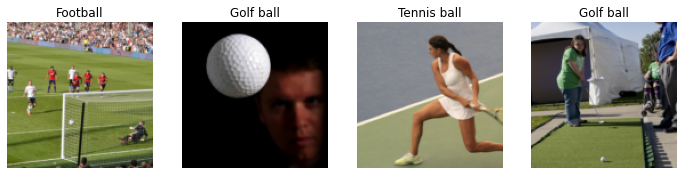

In [12]:
dls = balls.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

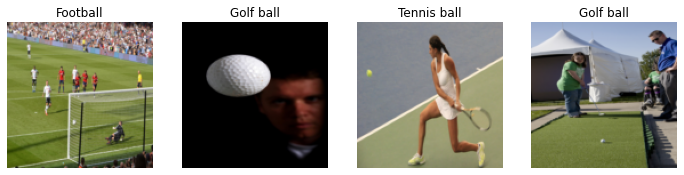

In [13]:
balls.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = balls.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

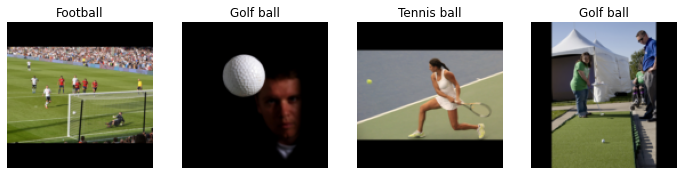

In [14]:
balls.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = balls.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

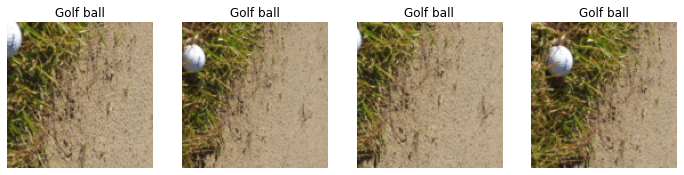

In [15]:
balls.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = balls.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

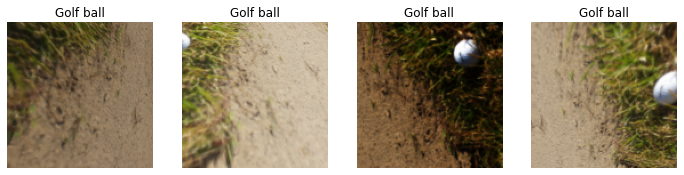

In [16]:
balls.new(item_tfms=Resize(128),
    batch_tfms=aug_transforms(mult=2))
dls = balls.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [17]:
balls.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
         batch_tfms=aug_transforms())
dls = balls.dataloaders(path)

In [27]:
learn = vision_learner(dls, arch=resnet34, metrics=[accuracy, error_rate])
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.174162,0.416156,0.893333,0.106667,00:13


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.490116,0.281991,0.913333,0.086667,00:13
1,0.378113,0.328361,0.906667,0.093333,00:13
2,0.277196,0.355748,0.906667,0.093333,00:13
3,0.222644,0.336266,0.913333,0.086667,00:14


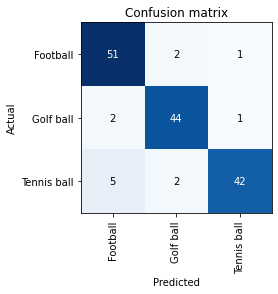

In [28]:
intrep = ClassificationInterpretation.from_learner(learn)
intrep.plot_confusion_matrix()

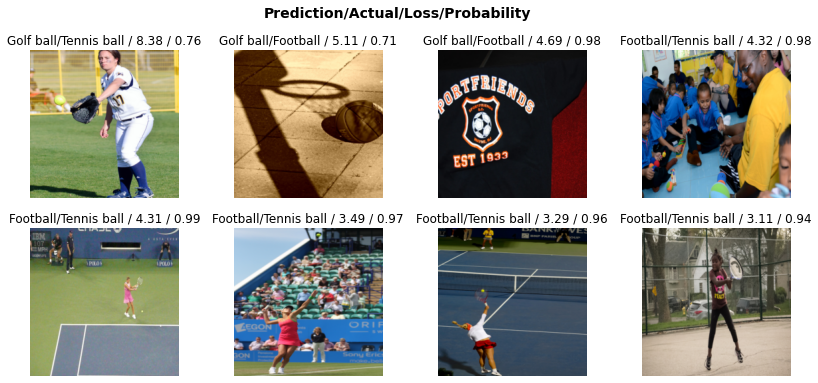

In [29]:
intrep.plot_top_losses(8, nrows=2, figsize=(14,6))

In [30]:
from fastai.vision.widgets import ImageClassifierCleaner
cleaner = ImageClassifierCleaner(learn)
cleaner

In [31]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [32]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat) 

In [33]:
# learn = vision_learner(dls, arch=resnet34, metrics=[accuracy, error_rate])
# learn.fine_tune(4)

In [34]:
learn.export()

In [36]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [37]:
learn_inf = load_learner(path/'export.pkl')

class: Football
probability: 0.999970


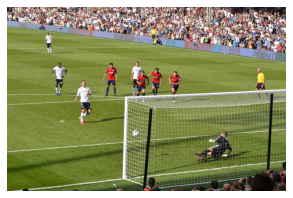

In [72]:
img_path = path/'train'/'Football'/listdir(path/'train'/'Football')[42]
img = PILImage.create(img_path)
img.show()
pred, pred_idx, probs = learn_inf.predict(img)
print(f"class: {pred}")
print(f"probability: {probs[pred_idx]:.6f}")

In [64]:
learn_inf.dls.vocab

['Football', 'Golf ball', 'Tennis ball']

In [65]:
from ipywidgets import widgets

In [66]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

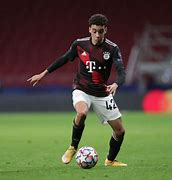

In [69]:
img = PILImage.create(btn_upload.data[-1])
img

In [71]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128, 128))
out_pl

Output()

In [73]:
pred, pred_idx, probs = learn_inf.predict(img)

In [75]:
lbl_pred = widgets.Label()
lbl_pred.value = f"Prediction: {pred}, Probability: {probs[pred_idx]:.6f}"
lbl_pred

Label(value='Prediction: Football, Probability: 0.999970')

In [77]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [78]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128, 128))
  pred, pred_idx, probs = learn_inf.predict(img)
  lbl_pred.value = f"Prediction: {pred}, Probability: {probs[pred_idx]:.6f}"
btn_run.on_click(on_click_classify)

In [82]:
from ipywidgets.widgets.widget_box import VBox
VBox([widgets.Label('Select your ball!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [83]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 28.9 MB/s 
     |████████████████████████████████| 112 kB 70.9 MB/s 
     |████████████████████████████████| 344 kB 71.9 MB/s 
     |████████████████████████████████| 563 kB 70.4 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 70 kB 11.6 MB/s 
     |████████████████████████████████| 423 kB 75.9 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 59 kB 7.9 MB/s 
     |████████████████████████████████| 80 kB 11.7 MB/s 
     |████████████████████████████████| 133 kB 75.4 MB/s 
     |████████████████████████████████| 86 kB 6.4 MB/s 
     |████████████████████████████████| 127 kB 71.7 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
 

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila  OK
